In [166]:
N = (3 + 4 ) % 5 + 1
N # 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27

3

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('NationalNames.csv')

In [192]:
# task 1
data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [196]:
# task 2
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [204]:
# task 4
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [224]:
# task 5
data['Name'].nunique()

93889

In [235]:
# task 6
data.groupby(['Gender'])['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

In [242]:
# task 7
data[(data['Year'] == 2010) & (data['Gender'] == 'M')].nlargest(5, 'Count')

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [251]:
## task 8
year = 1947
result = data[(data['Year'] == year) & (data['Count'] == data[data['Year'] == year]['Count'].max())]['Name'].values[0]
print(f"The name is '{result}' in {year}")

The name is 'Linda' in 1947


In [258]:
## task 9
min_count = data['Count'].min()
min_count_records = data[data['Count'] == min_count]
len(min_count_records)

254615

In [264]:
# task 10
unique_names_per_year = data.groupby('Year')['Name'].nunique()
unique_names_per_year

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [177]:
# task 11
year_with_most_unique_names = unique_names_per_year.idxmax()
most_unique_names_count = unique_names_per_year.max()
print(f"Year {year_with_most_unique_names}. Number of names {most_unique_names_count}")

Year 2008. Number of names 32488


In [269]:
# task 12
data[data['Year'] == year_with_most_unique_names].nlargest(1, 'Count')

,Id,Name,Year,Gender,Count
1608302,1608303,Jacob,2008,M,22568


In [274]:
# task 18
gender_year = data.groupby(['Year', 'Gender']).agg({'Count': 'sum'}).unstack()
more_f_years = gender_year[gender_year[('Count', 'F')] > gender_year[('Count', 'M')]]
len(more_f_years)

54

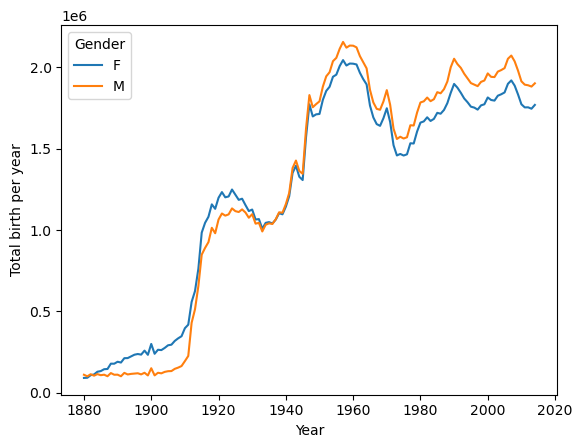

In [279]:
# task 19
import matplotlib.pyplot as plt

gender_counts_per_year = data.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum')
gender_counts_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total birth per year')
plt.show()

In [282]:
# task 20
data.groupby('Name')['Gender'].nunique().eq(2).sum()

10221

In [285]:
# task 21 
data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()

4139

In [288]:
# task 23
gender_neutral_names = data.groupby('Name')['Gender'].nunique().eq(2)
popular_gender_neutral_names = data[data['Name'].isin(gender_neutral_names[gender_neutral_names].index)]
print(popular_gender_neutral_names)

              Id       Name  Year Gender  Count
0              1       Mary  1880      F   7065
1              2       Anna  1880      F   2604
2              3       Emma  1880      F   2003
3              4  Elizabeth  1880      F   1939
4              5     Minnie  1880      F   1746
...          ...        ...   ...    ...    ...
1825392  1825393      Zaryn  2014      M      5
1825396  1825397     Zaylyn  2014      M      5
1825407  1825408      Zenas  2014      M      5
1825422  1825423      Ziyah  2014      M      5
1825425  1825426         Zo  2014      M      5

[689653 rows x 5 columns]


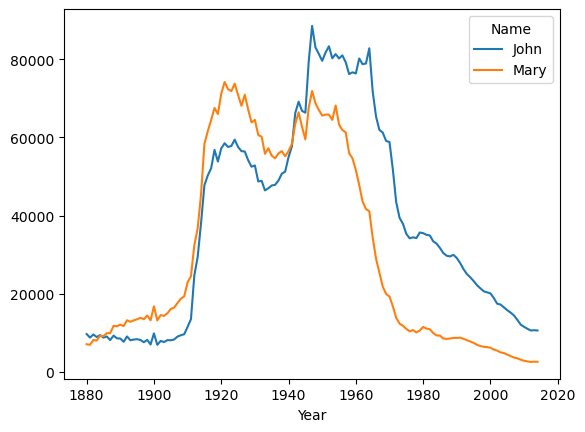

In [293]:
# task 25
john_and_mary_counts = data[(data['Name'].isin(['John', 'Mary']))]
john_and_mary_counts_pivot = john_and_mary_counts.pivot_table(index='Year', columns='Name', values='Count', aggfunc='sum')
john_and_mary_counts_pivot.plot(kind='line')
plt.xlabel('Year')
plt.show()

In [296]:
# task 27
most_popular_names_by_year = data.loc[data.groupby('Year')['Count'].idxmax()]
most_popular_names_by_year[['Year', 'Name', 'Count']]

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
